# Perqara Data Scientist Technical Test Submission
`Faisal Kengo`

## Library Import

In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import trapz
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Setting the random seed for reproducibility purpose.

In [446]:
seed_value = 14
random.seed(seed_value)
np.random.seed(seed_value)

## Dataset Loading

In [447]:
df_customers = pd.read_csv("https://raw.githubusercontent.com/FaisalKengo/TechnicalTest/main/data/customers_dataset.csv")
df_geolocation = pd.read_csv("https://raw.githubusercontent.com/FaisalKengo/TechnicalTest/main/data/geolocation_dataset.csv")
df_order_items = pd.read_csv("https://raw.githubusercontent.com/FaisalKengo/TechnicalTest/main/data/order_items_dataset.csv")
df_order_payments = pd.read_csv("https://raw.githubusercontent.com/FaisalKengo/TechnicalTest/main/data/order_payments_dataset.csv")
df_order_reviews = pd.read_csv("https://raw.githubusercontent.com/FaisalKengo/TechnicalTest/main/data/order_reviews_dataset.csv")
df_orders = pd.read_csv("https://raw.githubusercontent.com/FaisalKengo/TechnicalTest/main/data/orders_dataset.csv")
df_product_translation = pd.read_csv("https://raw.githubusercontent.com/FaisalKengo/TechnicalTest/main/data/product_category_name_translation.csv")
df_products = pd.read_csv("https://raw.githubusercontent.com/FaisalKengo/TechnicalTest/main/data/products_dataset.csv")
df_sellers = pd.read_csv("https://raw.githubusercontent.com/FaisalKengo/TechnicalTest/main/data/sellers_dataset.csv")

## Analysis

### Part 1: Costumers Dataset

First we check the information of the customers dataset.

In [448]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


From this information, we can tell that we have 99441 customers data consisting of 5 columns that depicts the customer's ID and customer's location information.

Let's check the data even further by looking at the dataset.


In [449]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


From this dataset, we know that the data is taken from Brazil just by looking at the `customer_city` column.

Now as the customer's ID are unique to each and every customer, we'll look on the distribution of what city and state did the customer mostly came from.

In [450]:
df_customers["customer_city"].value_counts().head()

sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_city, dtype: int64

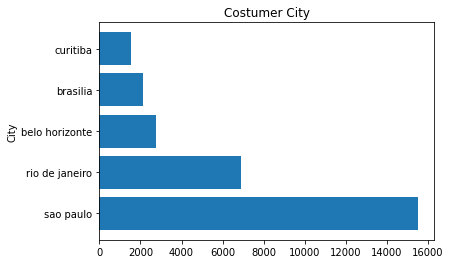

In [451]:
height = df_customers["customer_city"].value_counts().head()
bars = df_customers["customer_city"].value_counts().head().index
y_pos = np.arange(len(bars))
plt.title("Costumer City")
plt.barh(y_pos, height)
plt.ylabel("City")
plt.yticks(y_pos, bars)
plt.show()

Here we can see that the customer mostly came from the city of Sao Paulo, followed by the city of Rio de Janeiro, city of Belo Horizente, city of Brasilia, and city of Curitiba. We can also see that there's way more customer from the city of Sao Paulo compared to customer from other cities.

Now we'll check on which state each of the customers are located.

In [452]:
df_customers["customer_state"].value_counts().head()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_state, dtype: int64

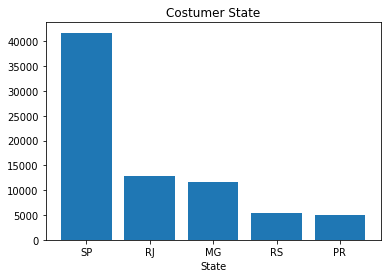

In [453]:
height = df_customers["customer_state"].value_counts().head()
bars = df_customers["customer_state"].value_counts().head().index
y_pos = np.arange(len(bars))
plt.title("Costumer State")
plt.bar(y_pos, height)
plt.xlabel("State")
plt.xticks(y_pos, bars)
plt.show()

From here we can see that the customers are mostly came from Sao Paulo state, Rio de Janeiro state, Minas Gerais state, Rio Grande do Sul state, and Parana state. Notice that the number of customer from Sao Paulo state dwarfs the number of customers from the other state as well.

We might also notice the disparity of customer's number between Sao Paulo the city and Sao Paulo the state. This is actually normal as Sao Paulo state consists of multiple cities, including Sao Paulo (the city) itself.

### Part 2: Geolocation Dataset

First we check the information of the geolocation dataset.

In [454]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


From this information, we can tell that we have 1000163 data consisting of 5 columns that depicts the general location and the exact coordinates of the customers.

Let's check the data even further by looking at the dataset.

In [455]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


From this dataset, we know that the data is taken from Brazil just by looking at the `geolocation_city` column.

We have quite a lot of numeric data here, so we'll see the mathematical description of those data.

In [456]:
df_geolocation.describe().T

,count,mean,std,min,25%,50%,75%,max
geolocation_zip_code_prefix,1000163.0,36574.166466,30549.335710,1001.000000,11075.000000,26530.000000,63504.000000,99990.000000
geolocation_lat,1000163.0,-21.176153,5.715866,-36.605374,-23.603546,-22.919377,-19.979620,45.065933
geolocation_lng,1000163.0,-46.390541,4.269748,-101.466766,-48.573172,-46.637879,-43.767709,121.105394


From here we can see that the geolocation lateral point spread between -36.61 and 45.07 and the geolocation longitudinal point spread between -101.47 and 121.11 with the estimated middle point of the location at (-46.64, -22.92).

Now we'll see which city does these coordination located.

In [457]:
df_geolocation["geolocation_city"].value_counts()

sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: geolocation_city, Length: 8011, dtype: int64

In [458]:
df_geolocation["geolocation_state"].value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

Here we can see that most of these coordinate points corresponds to multiple locations in Brazil. Let's see the area plot if this is really the case. First, we'll sort the dataset according to the location's longitudinal point.

In [459]:
df_area = df_geolocation.sort_values("geolocation_lng", ascending = True)
df_area

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
538557,29654,21.657547,-101.466766,santo antonio do canaa,ES
538512,29654,29.409252,-98.484121,santo antônio do canaã,ES
585242,35179,25.995203,-98.078544,santana do paraíso,MG
585260,35179,25.995245,-98.078533,santana do paraiso,MG
779240,69990,-7.597105,-72.930746,mâncio lima,AC
...,...,...,...,...,...
514429,28333,38.381672,-6.328200,raposo,RJ
697048,46560,38.991963,-4.947823,ibiajara,BA
727755,57319,45.065933,9.341528,pau d'arco,AL
513754,28155,42.439286,13.820214,santa maria,RJ


After that we split the data into two depending on the lateral's median point and then integrate both side of the data.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

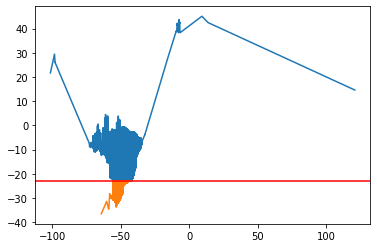

In [460]:
northern = df_area[df_area["geolocation_lat"] >= df_area["geolocation_lat"].median()]
southern = df_area[df_area["geolocation_lat"] < df_area["geolocation_lat"].median()]

area_N = trapz(northern["geolocation_lat"], northern["geolocation_lng"])
area_S = trapz(southern["geolocation_lat"], southern["geolocation_lng"])

plt.plot(northern["geolocation_lng"], northern["geolocation_lat"])
plt.plot(southern["geolocation_lng"], southern["geolocation_lat"])
plt.axhline(df_area["geolocation_lat"].median(), color='r')
plt.plot

We see that the area created from the plot is, indeed, shaped like the location of Brazil. Although curiously there are also some location on the northern side that are outside of Brazil region.

### Part 3: Order Items Dataset

First we check the information of the order items dataset.

In [461]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


From here we can see that we have 112650 data depicting the order's unique id and item id, the product's id, the seller's id, the shipping date, and the price and freight value of the order.

Now we'll look further into the data.

In [462]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


From here we can see that we can see the detail of the order, from what kind of items are ordered, when the order was shipped, how much does the item cost, and how valuable the freight order are.

Now for the plotting convenience we're going to convert the `shipping_limit_date` data type from object to datetime with year-month format.

In [463]:
df_order_items["shipping_limit_date"] = pd.to_datetime(df_order_items["shipping_limit_date"]).dt.strftime('%Y-%m')

Now we see the mathematical description of the dataset.

In [464]:
df_order_items.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


From here we can see that there are 21 item category on the list, with all of them having a price tag range from 0.85 to 6735 with average price at 120.65 and freight value range of 0 to 409.68 with average freight value at 19.99.

Now we'll see how long this dataset have been recorded.

In [465]:
print(f"Dataset were taken from {df_order_items.shipping_limit_date.min()} to {df_order_items.shipping_limit_date.max()}")

Dataset were taken from 2016-09 to 2020-04


After that, we'll see how many order were there for each of item category.

In [466]:
df_order_items["shipping_limit_date"].max()

'2020-04'

In [467]:
df_order_items["order_item_id"].value_counts().sort_index()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

We see here that item category 1 are the most ordered item noted in the dataset, and every item category beside item category 2 and 3 were too small to be considered here. So we'll going to merge every item category aside from category 1, 2, and 3.

In [468]:
for i in range(len(df_order_items)):
  if df_order_items["order_item_id"].iloc[i] >= 4:
    df_order_items["order_item_id"].iloc[i] = 4
  else:
    pass

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Now we'll see the distribution of item category in a bar plot.

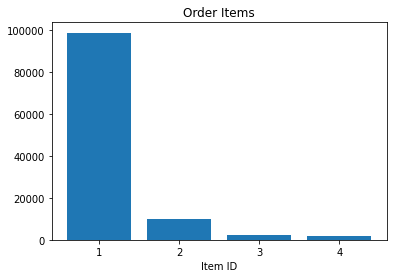

In [469]:
height = df_order_items["order_item_id"].value_counts()
bars = df_order_items["order_item_id"].value_counts().index
y_pos = np.arange(len(bars))
plt.title("Order Items")
plt.bar(y_pos, height)
plt.xlabel("Item ID")
plt.xticks(y_pos, bars)
plt.show()

Now we'll see that even after the merge of every item category beside item 1, 2, and 3, we can see that the amount of the order is still really small compared to the other item category.

Now we'll group the data according to the item ID.

In [470]:
df_order_items_1 = df_order_items.groupby("order_item_id").get_group(1)
df_order_items_2 = df_order_items.groupby("order_item_id").get_group(2)
df_order_items_3 = df_order_items.groupby("order_item_id").get_group(3)
df_order_items_4_etc = df_order_items.groupby("order_item_id").get_group(4)

Then we'll see the mathematic description from each group.

In [471]:
df_order_items.groupby("order_item_id").get_group(1).describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,98666.0,1.000000,0.000000,1.00,1.000,1.00,1.00,1.00
price,98666.0,125.964327,191.375106,0.85,41.505,79.00,139.90,6735.00
freight_value,98666.0,20.201927,15.909873,0.00,13.310,16.36,21.23,409.68


In [472]:
df_order_items.groupby("order_item_id").get_group(2).describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,9803.0,2.000000,0.000000,2.00,2.000,2.00,2.00,2.00
price,9803.0,85.456052,106.398657,0.85,34.900,59.00,99.99,2299.95
freight_value,9803.0,18.537902,14.239990,0.00,11.955,15.65,20.13,299.16


In [473]:
df_order_items.groupby("order_item_id").get_group(3).describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,2287.0,3.000000,0.000000,3.0,3.000,3.00,3.00,3.00
price,2287.0,78.004534,102.512099,1.2,29.900,49.90,90.25,1790.00
freight_value,2287.0,18.230691,14.970139,0.0,11.685,15.49,20.02,299.16


In [474]:
df_order_items.groupby("order_item_id").get_group(4).describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,1894.0,4.000000,0.000000,4.0,4.00,4.000,4.00,4.00
price,1894.0,77.679694,120.663425,1.2,25.60,49.900,98.70,1790.00
freight_value,1894.0,18.609076,18.305069,0.0,10.12,15.225,20.72,299.16


From each group, we can see some things:

* Orders with item ID 1 have a price range of 0.85 to 6735 with average price of 125.96 and freight value of 0 to 409.68 with average freight value of 20.20

* Orders with item ID 2 have a price range of 0.85 to 2299.95 with average price of 85.45 and freight value of 0 to 299.16 with average freight value of 18.54

* Orders with item ID 3 have a price range of 1.2 to 1790 with average price of 78 and freight value of 0 to 299.16 with average freight value of 18.23

* Orders with item ID 4 have a price range of 1.2 to 1790 with average price of 77.68 and freight value of 0 to 299.16 with average freight value of 18.61

As we can see, the maximum amount on both price and freight value for orders in every category are far bigger than the range between the minumum value and average value. Indicating that there's an outlier on those data. We'll create a function to winsorize the dataset.

In [475]:
def winsorize_order_items(df):
  q1_price = df["price"].quantile(0.25)
  q3_price = df["price"].quantile(0.75)
  iqr_price = q3_price - q1_price
  low_lim_price = q1_price - (iqr_price * 1.5)
  hi_lim_price = q3_price + (iqr_price * 1.5)
  q1_freight = df["freight_value"].quantile(0.25)
  q3_freight = df["freight_value"].quantile(0.75)
  iqr_freight = q3_freight - q1_freight
  low_lim_freight = q1_freight - (iqr_freight * 1.5)
  hi_lim_freight = q3_freight + (iqr_freight * 1.5)

  w_price = []
  w_value = []
  
  for i in range(len(df)):
    if df["price"].iloc[i] < low_lim_price:
      w_p = low_lim_price
    elif df["price"].iloc[i] > hi_lim_price:
      w_p = hi_lim_price
    else:
      w_p = df["price"].iloc[i]
    w_price.append(w_p)

  df["price_winsorized"] = w_price

  for i in range(len(df)):
    if df["freight_value"].iloc[i] < low_lim_freight:
      w_v = low_lim_freight
    elif df["freight_value"].iloc[i] > hi_lim_freight:
      w_v = hi_lim_freight
    else:
      w_v = df["freight_value"].iloc[i]
    w_value.append(w_v)

  df["freight_value_winsorized"] = w_value
  
  return

Then we apply the function to each of our grouped data.

In [476]:
winsorize_order_items(df_order_items_1)
winsorize_order_items(df_order_items_2)
winsorize_order_items(df_order_items_3)
winsorize_order_items(df_order_items_4_etc)

<ipython-input-475-787b2ef4b847>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price_winsorized"] = w_price
<ipython-input-475-787b2ef4b847>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["freight_value_winsorized"] = w_value


Now we see the mathematic description for the winsorized data.

In [477]:
df_order_items_1.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,98666.0,1.000000,0.000000,1.00,1.000,1.00,1.00,1.0000
price,98666.0,125.964327,191.375106,0.85,41.505,79.00,139.90,6735.0000
freight_value,98666.0,20.201927,15.909873,0.00,13.310,16.36,21.23,409.6800
price_winsorized,98666.0,102.396436,78.887643,0.85,41.505,79.00,139.90,287.4925
freight_value_winsorized,98666.0,17.955432,7.315904,1.43,13.310,16.36,21.23,33.1100


In [478]:
df_order_items_2.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,9803.0,2.000000,0.000000,2.00,2.000,2.00,2.00,2.0000
price,9803.0,85.456052,106.398657,0.85,34.900,59.00,99.99,2299.9500
freight_value,9803.0,18.537902,14.239990,0.00,11.955,15.65,20.13,299.1600
price_winsorized,9803.0,74.761303,53.599060,0.85,34.900,59.00,99.99,197.6250
freight_value_winsorized,9803.0,16.807086,7.550706,0.00,11.955,15.65,20.13,32.3925


In [479]:
df_order_items_3.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,2287.0,3.000000,0.000000,3.0,3.000,3.00,3.00,3.0000
price,2287.0,78.004534,102.512099,1.2,29.900,49.90,90.25,1790.0000
freight_value,2287.0,18.230691,14.970139,0.0,11.685,15.49,20.02,299.1600
price_winsorized,2287.0,67.300387,50.356823,1.2,29.900,49.90,90.25,180.7750
freight_value_winsorized,2287.0,16.524699,7.785049,0.0,11.685,15.49,20.02,32.5225


In [480]:
df_order_items_4_etc.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,1894.0,4.000000,0.000000,4.0,4.00,4.000,4.00,4.00
price,1894.0,77.679694,120.663425,1.2,25.60,49.900,98.70,1790.00
freight_value,1894.0,18.609076,18.305069,0.0,10.12,15.225,20.72,299.16
price_winsorized,1894.0,67.765966,55.708175,1.2,25.60,49.900,98.70,208.35
freight_value_winsorized,1894.0,16.713812,9.097162,0.0,10.12,15.225,20.72,36.62


From each group, we can see some things:

* Orders with item ID 1 have a price range of 0.85 to 287.49 with average price of 102.39 and freight value of 1.43 to 33.11 with average freight value of 17.96

* Orders with item ID 2 have a price range of 0.85 to 197.63 with average price of 74.76 and freight value of 0 to 32.39 with average freight value of 16.81

* Orders with item ID 3 have a price range of 1.2 to 180.78 with average price of 67.3 and freight value of 0 to 32.52 with average freight value of 16.52

* Orders with item ID 4 have a price range of 1.2 to 208.35 with average price of 67.77 and freight value of 0 to 36.62 with average freight value of 16.71

As we can see, the winsorizing does manage to normalize the data. But this process affect the statistical description.

### Part 4: Order Payments Dataset

First we check the information of the order items dataset.

In [481]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


From this information, we can tell that we have 103886 data consisting of 5 columns that depicts various customer's payment information, from the ID, payment sequential, payment type, payment installments, and payment value.

Let's check the data even further by looking at the dataset.

In [482]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Here we can see that the data contains a string that depicts the order ID and its' payment details.

Now we'll see the mathematic description of this data.

In [483]:
df_order_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


Here we can conclude some things:

* The payment sequential range is between 1 to 29, with the average of 1.

* The payment installment range is between 1 to 24, with the average of 2.

* The payment value range is between 0 to 13664.08, with the average of 154.10

From here, we can tell that there are obvious outlier on the data. But before we handle it, we'll see what kind of payment did the customer use:

In [484]:
df_order_payments["payment_type"].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

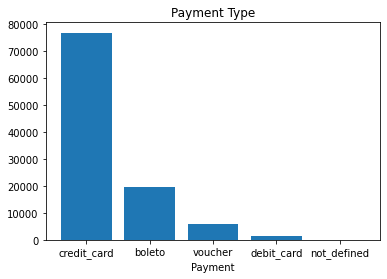

In [485]:
height = df_order_payments["payment_type"].value_counts()
bars = df_order_payments["payment_type"].value_counts().index
y_pos = np.arange(len(bars))
plt.title("Payment Type")
plt.bar(y_pos, height)
plt.xlabel("Payment")
plt.xticks(y_pos, bars)
plt.show()

From here we see that most customers are paying with credit card, with boleto paying method following behind.

After this we'll create the clustering to segment the customer. But first we should handle the outliers that we have on the data. This can be done by doing winsorizing below.

In [486]:
def winsorize_order_payment(df):
  q1_sequential = df["payment_sequential"].quantile(0.25)
  q3_sequential = df["payment_sequential"].quantile(0.75)
  iqr_sequential = q3_sequential - q1_sequential
  low_lim_sequential = round(q1_sequential - (iqr_sequential * 1.5))
  hi_lim_sequential = round(q3_sequential + (iqr_sequential * 1.5))
  q1_installments = df["payment_installments"].quantile(0.25)
  q3_installments = df["payment_installments"].quantile(0.75)
  iqr_installments = q3_installments - q1_installments
  low_lim_installments = round(q1_installments - (iqr_installments * 1.5))
  hi_lim_installments = round(q3_installments + (iqr_installments * 1.5))
  q1_value = df["payment_value"].quantile(0.25)
  q3_value = df["payment_value"].quantile(0.75)
  iqr_value = q3_value - q1_value
  low_lim_value = q1_value - (iqr_value * 1.5)
  hi_lim_value = q3_value + (iqr_value * 1.5)

  w_sequential = []
  w_installments = []
  w_value = []
  
  for i in range(len(df)):
    if df["payment_sequential"].iloc[i] < low_lim_sequential:
      w_r = low_lim_sequential
    elif df["payment_sequential"].iloc[i] > hi_lim_sequential:
      w_r = hi_lim_sequential
    else:
      w_r = df["payment_sequential"].iloc[i]
    w_sequential.append(w_r)

  df["sequential"] = w_sequential

  for i in range(len(df)):
    if df["payment_installments"].iloc[i] < low_lim_installments:
      w_f = low_lim_installments
    elif df["payment_installments"].iloc[i] > hi_lim_installments:
      w_f = hi_lim_installments
    else:
      w_f = df["payment_installments"].iloc[i]
    w_installments.append(w_f)

  df["installments"] = w_installments

  for i in range(len(df)):
    if df["payment_value"].iloc[i] < low_lim_value:
      w_m = low_lim_value
    elif df["payment_value"].iloc[i] > hi_lim_value:
      w_m = hi_lim_value
    else:
      w_m = df["payment_value"].iloc[i]
    w_value.append(w_m)

  df["value"] = w_value
  
  return

After we create the function we can apply it to the dataset.

In [487]:
winsorize_order_payment(df_order_payments)

Then we check the newly-added data inside the dataset.

In [488]:
df_order_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00000
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00000
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08000
sequential,103886.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.00000
installments,103886.0,2.723100,2.339366,0.0,1.00,1.0,4.0000,8.00000
value,103886.0,128.065718,93.731834,0.0,56.79,100.0,171.8375,344.40875


Now we see that there are no more outlier in the added columns, we can start doing the segmentation by making clusters. First we'll take the `installments` and `value` columns as our base to create the clustering (`sequential` isn't used here since the data there are uniform, which won't make any different in the clustering).

In [489]:
df_order_payments_cluster = df_order_payments[["installments", "value"]]
df_order_payments_cluster.head()

,installments,value
0,8,99.33
1,1,24.39
2,1,65.71
3,8,107.78
4,2,128.45


Then we're scale the data and subsequently find the best number of clusters that we're going to use.

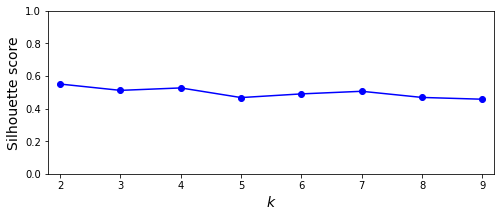

In [490]:
num_scaler = MinMaxScaler()
num_scaler.fit(df_order_payments_cluster)

df_order_payments_cluster_scaled = num_scaler.transform(df_order_payments_cluster)

kmeans_per_k = [KMeans(n_clusters = k, random_state = seed_value).fit(df_order_payments_cluster_scaled)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(df_order_payments_cluster_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 9.2, 0, 1])
plt.show()


From the plot above we can conclude that the data is best split into two clusters. Now with this in mind we'll do the actual clustering.

In [491]:
k = 2
kmeans = KMeans(n_clusters = k, random_state = seed_value)
y_pred_kmeans = kmeans.fit_predict(df_order_payments_cluster_scaled)
y_pred_kmeans_df = pd.DataFrame(y_pred_kmeans, columns = ["cluster"])
df_order_payments_cluster_result = pd.concat([df_order_payments, y_pred_kmeans_df], axis = 1)
df_order_payments_cluster_result.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,sequential,installments,value,cluster
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,8,99.33,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,1,24.39,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,1,65.71,1
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,8,107.78,0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,2,128.45,1


After this we can plot the cluster.

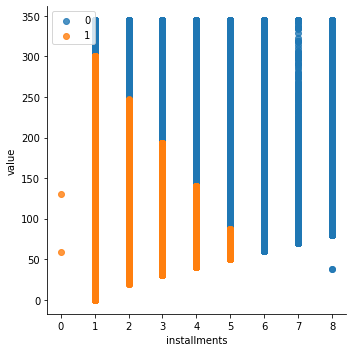

In [492]:
sns.lmplot(x = "installments", y = "value", data = df_order_payments_cluster_result, fit_reg = False, hue = "cluster", legend = False)
plt.legend(loc = "upper left")

plt.show()


From the plot, we can conclude that cluster 0 is the cluster where the customer either have a large number of payment installments already or have a really high payment value even at the smaller number of installments. Meanwhile, cluster 1 is the cluster where customer have relatively smaller number of payment installments and doesn't have as much payment value in general.

### Part 5: Order Reviews Dataset

First we check the information of the order review dataset.

In [493]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


From this information, we can tell that we have 99224 data consisting of 7 columns that depicts various information regarding the order review post, including both the review and order ID and the reviews itself. We also noticed that there's a lot of null data on the `review_comment_title` and `review_comment_message` columns. But considering that consumer can usually leave these section empty when sending the review, we will let this null data as it is.

Let's check the data even further by looking at the dataset.

In [494]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


From the dataset, we can conclude that the review were posted in Portugese. For the sake of clarity we'll now change the object data type in `review_creation_date` and `review_answer_timestamp` to datetype.

In [495]:
df_order_reviews["review_creation_date"] = pd.to_datetime(df_order_reviews["review_creation_date"])
df_order_reviews["review_answer_timestamp"] = pd.to_datetime(df_order_reviews["review_answer_timestamp"])

And now we can see the time range for this dataset.

In [496]:
print(f"Dataset were taken from {df_order_reviews.review_answer_timestamp.min()} to {df_order_reviews.review_answer_timestamp.max()}")

Dataset were taken from 2016-10-07 18:32:28 to 2018-10-29 12:27:35


After that we'll see the review score distribution.

In [497]:
df_order_reviews["review_score"].value_counts().sort_index()

1    11424
2     3151
3     8179
4    19142
5    57328
Name: review_score, dtype: int64

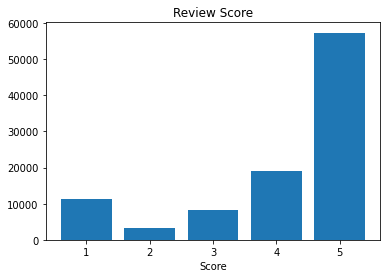

In [498]:
height = df_order_reviews["review_score"].value_counts().sort_index()
bars = df_order_reviews["review_score"].value_counts().sort_index().index
y_pos = np.arange(len(bars))
plt.title("Review Score")
plt.bar(y_pos, height)
plt.xlabel("Score")
plt.xticks(y_pos, bars)
plt.show()

As we can see here, the review score are spread between 1 to 5. Most of the customers were satisfied according to the review score, but there are a handful amount of customers that voiced their dissapointment as well.

Now we'll group the review data based on its' review score.

In [499]:
df_order_reviews_1 = df_order_reviews.groupby("review_score").get_group(1)
df_order_reviews_2 = df_order_reviews.groupby("review_score").get_group(2)
df_order_reviews_3 = df_order_reviews.groupby("review_score").get_group(3)
df_order_reviews_4 = df_order_reviews.groupby("review_score").get_group(4)
df_order_reviews_5 = df_order_reviews.groupby("review_score").get_group(5)

Then we'll see the how review from each score are constructed.

In [500]:
df_order_reviews_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11424 entries, 5 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                11424 non-null  object        
 1   order_id                 11424 non-null  object        
 2   review_score             11424 non-null  int64         
 3   review_comment_title     1873 non-null   object        
 4   review_comment_message   8745 non-null   object        
 5   review_creation_date     11424 non-null  datetime64[ns]
 6   review_answer_timestamp  11424 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 714.0+ KB


In [501]:
df_order_reviews_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 16 to 99203
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                3151 non-null   object        
 1   order_id                 3151 non-null   object        
 2   review_score             3151 non-null   int64         
 3   review_comment_title     478 non-null    object        
 4   review_comment_message   2145 non-null   object        
 5   review_creation_date     3151 non-null   datetime64[ns]
 6   review_answer_timestamp  3151 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 196.9+ KB


In [502]:
df_order_reviews_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8179 entries, 14 to 99216
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                8179 non-null   object        
 1   order_id                 8179 non-null   object        
 2   review_score             8179 non-null   int64         
 3   review_comment_title     824 non-null    object        
 4   review_comment_message   3557 non-null   object        
 5   review_creation_date     8179 non-null   datetime64[ns]
 6   review_answer_timestamp  8179 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 511.2+ KB


In [503]:
df_order_reviews_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19142 entries, 0 to 99222
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                19142 non-null  object        
 1   order_id                 19142 non-null  object        
 2   review_score             19142 non-null  int64         
 3   review_comment_title     1735 non-null   object        
 4   review_comment_message   5976 non-null   object        
 5   review_creation_date     19142 non-null  datetime64[ns]
 6   review_answer_timestamp  19142 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.2+ MB


In [504]:
df_order_reviews_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57328 entries, 1 to 99221
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                57328 non-null  object        
 1   order_id                 57328 non-null  object        
 2   review_score             57328 non-null  int64         
 3   review_comment_title     6658 non-null   object        
 4   review_comment_message   20554 non-null  object        
 5   review_creation_date     57328 non-null  datetime64[ns]
 6   review_answer_timestamp  57328 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 3.5+ MB


From the information above, we can conclude that for the review with score lower than 3, more customers tend to write additional comments in addition to the review score. Meanwhile, customer who give more than 3 in the review score tends to not write additional message along with the review score. From the information above, we can also conclude that most customer doesn't even bother putting a title for their review message.

### Part 6: Orders Dataset

First we check the information of the order dataset.

In [505]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


From this information, we can tell that we have 99441 data consisting of 8 columns that depicts various information regarding the order, including both the order and customer ID and also the order timestamp during each of the order process completion. We notice that there are several null data on several column, and we will leave it at that in assumption that when this data is taken there are still order that haven't gone through the order process.

Let's check the data even further by looking at the dataset.

In [506]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Here we can see that the data consists of the order status, including all of its' timestamp for each of the process.

As with before, we'll convert the object data type in the timestamp columns to datetime data type.

In [507]:
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"])
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"])
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"])

Now we can see the timestamp range for each of the order process.

In [508]:
print(f"Order Purchase Timestamp were taken from {df_orders.order_purchase_timestamp.min()} to {df_orders.order_purchase_timestamp.max()}")
print(f"Order Approval Timestamp were taken from {df_orders.order_approved_at.min()} to {df_orders.order_approved_at.max()}")
print(f"Delivered to Carrier Timestamp were taken from {df_orders.order_delivered_carrier_date.min()} to {df_orders.order_delivered_carrier_date.max()}")
print(f"Delivered to Customer Timestamp were taken from {df_orders.order_delivered_customer_date.min()} to {df_orders.order_delivered_customer_date.max()}")
print(f"Delivery Estimation were taken from {df_orders.order_estimated_delivery_date.min()} to {df_orders.order_estimated_delivery_date.max()}")

Order Purchase Timestamp were taken from 2016-09-04 21:15:19 to 2018-10-17 17:30:18
Order Approval Timestamp were taken from 2016-09-15 12:16:38 to 2018-09-03 17:40:06
Delivered to Carrier Timestamp were taken from 2016-10-08 10:34:01 to 2018-09-11 19:48:28
Delivered to Customer Timestamp were taken from 2016-10-11 13:46:32 to 2018-10-17 13:22:46
Delivery Estimation were taken from 2016-09-30 00:00:00 to 2018-11-12 00:00:00


Now we'll see the order status from this dataset.

In [509]:
df_orders["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

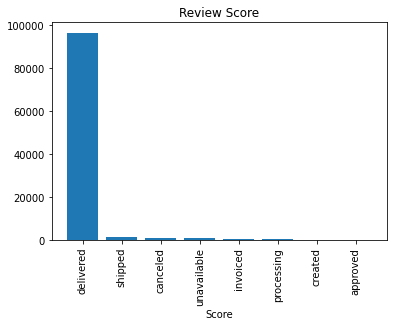

In [510]:
height = df_orders["order_status"].value_counts()
bars = df_orders["order_status"].value_counts().index
y_pos = np.arange(len(bars))
plt.title("Review Score")
plt.bar(y_pos, height)
plt.xlabel("Score")
plt.xticks(y_pos, bars, rotation = 90)
plt.show()

From here we can see that most of the order recorded was already delivered, with a little order labeled as 'shipped' status. This proves that the order process were going fine for all the time the dataset was taken.

### Part 7: Product Dataset

First we check the information of the product translation dataset.

In [511]:
df_product_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


This dataset only have 71 entries with two columns. Let's check the content of the dataset.

In [512]:
df_product_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


This dataset contains the product category in Portugese and English. We will use this dataset for later.

For now, we'll check the product dataset.

In [513]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


This dataset contains the the information about the product, ranging from its' name, description, and dimension of the product.

We can look further inside the data.

In [514]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


As we can see here, we have several item categories along with their respective dimension and description. Also we might notice here that the product category are all in Portugese. Now before we translate that column with the product translation dataset, we'll check how many kind of items were listed on this dataset.

In [515]:
df_products["product_category_name"].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

We have 73 different kinds of unique item categories on the dataset, which is more than what we have on the translation dataset. So we'll create a loop where we translate every product name accordingly, while letting the items not listed in the translation list as it is.

In [516]:
for i in range(len(df_products)):
  for j in range(len(df_product_translation)):
    if df_products["product_category_name"].iloc[i] == df_product_translation["product_category_name"].iloc[j]:
      df_products["product_category_name"].iloc[i] = df_product_translation["product_category_name_english"].iloc[j]
    else:
      pass

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Now we'll check how many items are there in each product categories.

In [517]:
df_products["product_category_name"].value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: product_category_name, Length: 73, dtype: int64

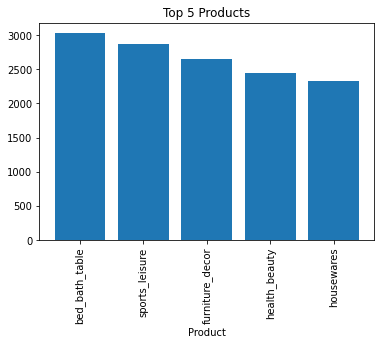

In [518]:
height = df_products["product_category_name"].value_counts().head()
bars = df_products["product_category_name"].value_counts().head().index
y_pos = np.arange(len(bars))
plt.title("Top 5 Products")
plt.bar(y_pos, height)
plt.xlabel("Product")
plt.xticks(y_pos, bars, rotation = 90)
plt.show()

As we can see here, the top 5 products available here came from furniture categories, sports equipment categories, furniture decoration category, health category, and housewares category.

### Part 8: Sellers Dataset

First we check the information of the sellers dataset.

In [519]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


This dataset contains the information about 3095 seller's location information. To confirm, we can look inside the dataset itself.

In [520]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Here we can see the location information about every single seller recorded. Just by looking at the seller's city and state, we can conclude that this dataset is taken from Brazil.

Now we'll see the how many sellers are in each cities recorded in the dataset.

In [521]:
df_sellers["seller_city"].value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64

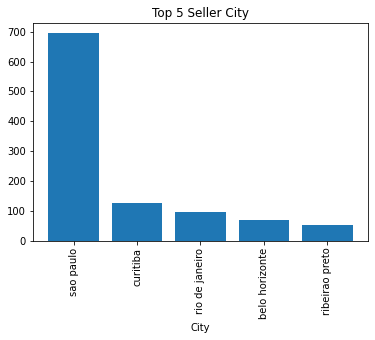

In [522]:
height = df_sellers["seller_city"].value_counts().head()
bars = df_sellers["seller_city"].value_counts().head().index
y_pos = np.arange(len(bars))
plt.title("Top 5 Seller City")
plt.bar(y_pos, height)
plt.xlabel("City")
plt.xticks(y_pos, bars, rotation = 90)
plt.show()

Here we can see that the sellers mostly came from Sao Paulo, Curitiba, Rio de Janeiro, Belo Horizonte, and Ribeirao Preto.

We also want to know on which state where the sellers are located the most.

In [523]:
df_sellers["seller_state"].value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64

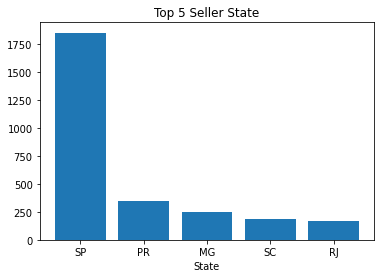

In [524]:
height = df_sellers["seller_state"].value_counts().head()
bars = df_sellers["seller_state"].value_counts().head().index
y_pos = np.arange(len(bars))
plt.title("Top 5 Seller State")
plt.bar(y_pos, height)
plt.xlabel("State")
plt.xticks(y_pos, bars)
plt.show()

From here we can see that the state of Sao Paulo is where most sellers came from. Followed by the state of Parana, the state of Minas Gerais, the state of Santa Catarina, and the state of Rio de Janeiro.